Performance of Sparse Recovery Using L1 Minimization
====================================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This tour explores theoritical garantees for the performance of recovery
using $\ell^1$ minimization.

In [3]:
options(warn=-1) # turns off warnings, to turn on: "options(warn=0)"
library(pracma)
library(imager)

# Importing the libraries
for (f in list.files(path="nt_toolbox/toolbox_general/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_general/", f, sep=""))
}
for (f in list.files(path="nt_toolbox/toolbox_signal/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_signal/", f, sep=""))
}

Sparse $\ell^1$ Recovery
--------------------------
We consider the inverse problem of estimating an unknown signal $x_0 \in
\RR^N$ from noisy measurements $y=\Phi x_0 + w \in \RR^P$ where $\Phi \in \RR^{P \times N}$
is a measurement matrix with $P \leq N$, and $w$ is some noise.


This tour is focused on recovery using $\ell^1$ minimization
$$ x^\star \in \uargmin{x \in \RR^N} \frac{1}{2}\norm{y-\Phi x}^2 + \la \norm{x}_1. $$


Where there is no noise, we consider the problem $ \Pp(y) $
$$ x^\star \in \uargmin{\Phi x = y} \norm{x}_1. $$


We are not concerned here about the actual way to solve this convex
problem (see the other numerical tours on sparse regularization) but
rather on the theoritical analysis of wether $x^\star$ is close to
$x_0$.


More precisely, we consider the following three key properties


* *Noiseless identifiability*: $x_0$ is the unique solution of $
\Pp(y) $ for $y=\Phi x_0$.
* *Robustess to small noise*: one has $\norm{x^\star - x_0} =
O(\norm{w})$ for $y=\Phi x_0+w$ if $\norm{w}$ is smaller than
an arbitrary small constant that depends on $x_0$ if $\la$ is well chosen according to $\norm{w}$.
* *Robustess to bounded noise:* same as above, but $\norm{w}$ can be
arbitrary.




Note that noise robustness implies identifiability, but the converse
is not true in general.


Coherence Criteria
------------------
The simplest criteria for identifiality are based on the coherence of the
matrix $\Phi$ and depends only on the sparsity $\norm{x_0}_0$ of the
original signal. This criteria is thus not very precise and gives very pessimistic
bounds.


The coherence of the matrix $\Phi = ( \phi_i )_{i=1}^N \in \RR^{P \times
N}$ with unit norm colum $\norm{\phi_i}=1$ is
$$ \mu(\Phi) = \umax{i \neq j} \abs{\dotp{\phi_i}{\phi_j}}. $$



Compute the correlation matrix (remove the diagonal of 1's).

In [4]:
remove_diag = function(C){C - base::diag(base::diag(C))}
Correlation = function(Phi){remove_diag(abs(t(Phi) %*% Phi))}

Compute the coherence $\mu(\Phi)$.

In [5]:
mu = function(Phi){max(Correlation(Phi))}

The condition
$$ \norm{x_0}_0 < \frac{1}{2}\pa{1 + \frac{1}{\mu(\Phi)}} $$
implies that $x_0$ is identifiable, and also implies to robustess to small and bounded noise.


Equivalently, this condition can be written as $\text{Coh}(\norm{x_0}_0)<1$
where
$$ \text{Coh}(k) = \frac{k \mu(\Phi)}{ 1 - (k-1)\mu(\Phi) } $$

In [6]:
Coh = function(Phi, k){(k * mu(Phi)) / (1 - (k-1) * mu(Phi))}

Generate a matrix with random unit columns in $\RR^P$.

In [7]:
normalize = function(Phi){t(t(Phi) / sqrt(apply(Phi**2,2, sum)))}
PhiRand = function(P, N){normalize(matrix( rnorm(P*N,mean=0,sd=1), P, N))}
Phi = PhiRand(250, 1000)

Compute the coherence and the maximum possible sparsity to ensure
recovery using the coherence bound.

In [8]:
c = mu(Phi)
print(paste("Coherence:", round(c, 2)))
print(paste("Sparsity max:", floor(1/2*(1 + 1/c))))

[1] "Coherence: 0.32"
[1] "Sparsity max: 2"


__Exercise 1__

Display how the average coherence of a random matrix
decays with the redundancy $\eta = P/N$ of
the matrix $\Phi$. Can you derive an empirical law between
$P$ and the maximal sparsity?

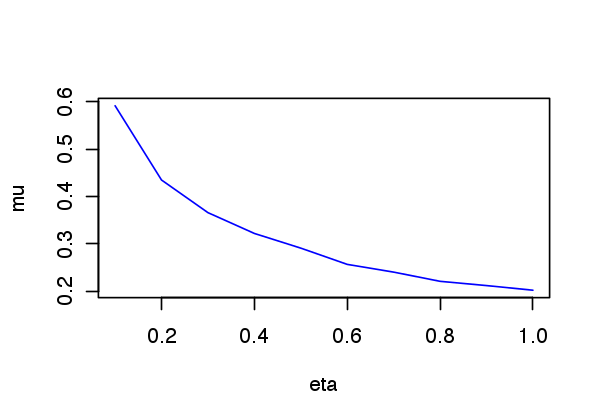

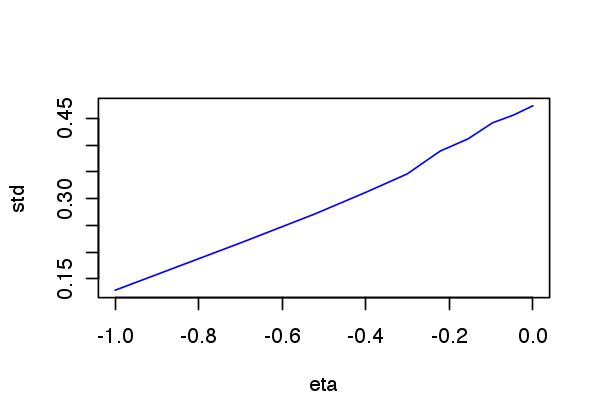

In [9]:
source("nt_solutions/sparsity_6_l1_recovery/exo1.R")

In [10]:
##Insert your code here.

Support and Sign-based Criteria
-------------------------------
In the following we will consider the support
$$ \text{supp}(x_0) = \enscond{i}{x_0(i) \neq 0} $$
of the vector $x_0$. The co-support is its complementary $I^c$.

In [11]:
where = function(I)
       {
         n = length(I)
         out = c()
         for (i in 1:n)
         {
             if (I[i] == TRUE)
             {
                 out = c(out, i)
             }
         }
        return(out)
        }

supp   = function(s){where(abs(s) > 1e-5)}
cosupp = function(s){where(abs(s) < 1e-5)}

Given some support $ I \subset \{0,\ldots,N-1\} $, we will denote as
$ \Phi = (\phi_m)_{m \in I} \in \RR^{N \times \abs{I}}$ the
sub-matrix extracted from $\Phi$ using the columns indexed by $I$.


J.J. Fuchs introduces a criteria $F$ for identifiability that depends on the
sign of $x_0$.


J.J. Fuchs. _Recovery of exact sparse representations in the presence of
bounded noise._ IEEE Trans. Inform. Theory, 51(10), p. 3601-3608, 2005


Under the condition that $\Phi_I$ has full rank, the $F$ measure
of a sign vector $s \in \{+1,0,-1\}^N$ with $\text{supp}(s)=I$ reads
$$ \text{F}(s) = \norm{ \Psi_I s_I }_\infty
      \qwhereq \Psi_I = \Phi_{I^c}^* \Phi_I^{+,*} $$
where $ A^+ = (A^* A)^{-1} A^* $ is the pseudo inverse of a
matrix $A$.


The condition
$$ \text{F}(\text{sign}(x_0))<1 $$
implies that $x_0$ is identifiable, and also implies to robustess to
small noise. It does not however imply robustess to a bounded noise.


Compute $\Psi_I$ matrix.

In [12]:
PsiI = function(Phi,I)
{
keep_indices = c()
for (i in 1:dim(Phi)[2])
{
    if (!(i %in% I))
    {
        keep_indices = c(keep_indices, i)
    }
}
return (t(Phi[,keep_indices]) %*% t(pinv(as.matrix(Phi[,I]))))
}

Compute $\text{F}(s)$.

In [13]:
F = function(Phi,s){base::norm(PsiI(Phi, supp(s)) %*% s[supp(s)], type="I")}

The Exact Recovery Criterion (ERC) of a support $I$,
introduced by Tropp in


J. A. Tropp. _Just relax: Convex programming methods for identifying
sparse signals._ IEEE Trans. Inform. Theory, vol. 52, num. 3, pp. 1030-1051, Mar. 2006.


Under the condition that $\Phi_I$ has full rank, this condition reads
$$ \text{ERC}(I) = \norm{\Psi_{I}}_{\infty,\infty}
      =  \umax{j \in I^c} \norm{ \Phi_I^+ \phi_j }_1. $$
where $\norm{A}_{\infty,\infty}$ is the $\ell^\infty-\ell^\infty$
operator norm of a matrix $A$.

In [14]:
erc = function(Phi, I){base::norm(PsiI(Phi, I), type="I")}

The condition
$$ \text{ERC}(\text{supp}(x_0))<1 $$
implies that $x_0$ is identifiable, and also implies to robustess to
small and bounded noise.


One can prove that the ERC is the maximum of the F criterion for all signs of the given
support
$$ \text{ERC}(I) = \umax{ s, \text{supp}(s) \subset I } \text{F}(s). $$


The weak-ERC is an approximation of the ERC using only the correlation
matrix
$$ \text{w-ERC}(I) = \frac{
      \umax{j \in I^c} \sum_{i \in I} \abs{\dotp{\phi_i}{\phi_j}}
 }{
      1-\umax{j \in I} \sum_{i \neq j \in I} \abs{\dotp{\phi_i}{\phi_j}}
 }$$

In [15]:
setdiff = function(n, I)
          {keep_indices = c()
            for (i in 1:n)
            {
                if (!(i %in% I))
                {
                    keep_indices = c(keep_indices, i)
                }
            }
           return(keep_indices)
          }

g = function(C,I){apply(as.matrix(C[,I]), 1, sum)}
werc_g = function(g,I,J){max(g[J])/(1 - max(g[I]))}
werc = function(Phi,I){werc_g(g(Correlation(Phi), I), I, setdiff(dim(Phi)[2], I))}

One has, if $\text{w-ERC}(I)>0$,  for $ I = \text{supp}(s) $,
$$ \text{F}(s) \leq \text{ERC}(I) \leq \text{w-ERC}(I) \leq
      \text{Coh}(\abs{I}). $$


This shows in particular that the condition
$$ \text{w-ERC}(\text{supp}(x_0))<1 $$
implies identifiability and robustess to small and bounded noise.

__Exercise 2__

Show that this inequality holds on a given matrix.
What can you conclude about the sharpness of these criteria ?

In [16]:
source("nt_solutions/sparsity_6_l1_recovery/exo2.R")

[1] "N = 2000 , P = 1990 , |I| = 6"
[1] "F(s) = 0.19"
[1] "ERC(I) = 0.23"
[1] "w-ERC(s) = 0.27"
[1] "Coh(|s|) = 1.65"


In [17]:
## Insert your code here.

__Exercise 3__

For a given matrix $\Phi$ generated using PhiRand, draw as a function of the sparsity $k$
the probability that a random sign vector $s$ of sparsity
$\norm{s}_0=k$ satisfies the conditions $\text{F}(x_0)<1$,
$\text{ERC}(x_0)<1$ and $\text{w-ERC}(x_0)<1$

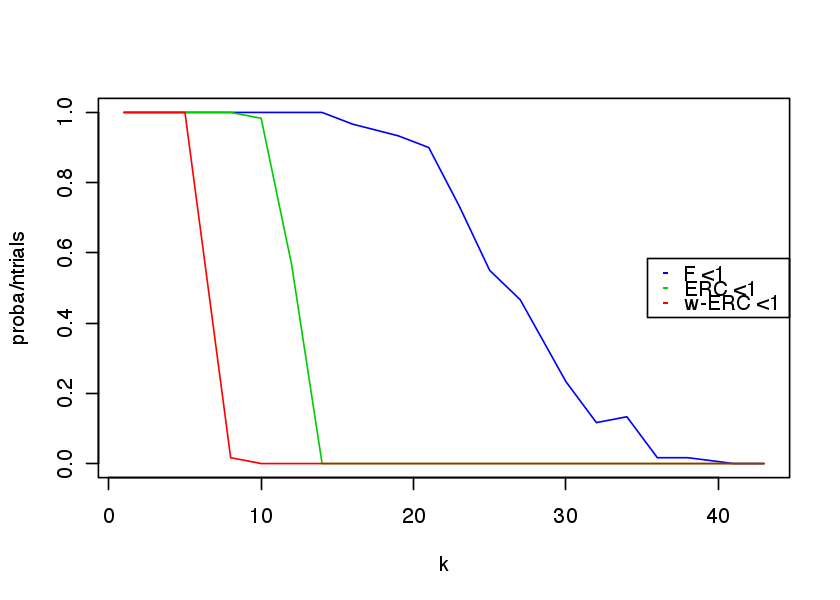

In [18]:
source("nt_solutions/sparsity_6_l1_recovery/exo3.R")

In [19]:
#Insert your code here.

Restricted Isometry Criteria
----------------------------
The restricted isometry constants $\de_k^1,\de_k^2$ of a matrix $\Phi$ are the
smallest $\de^1,\de^2$ that satisfy
$$ \forall x \in \RR^N, \quad \norm{x}_0 \leq k \qarrq
      (1-\de^1)\norm{x}^2 \leq \norm{\Phi x}^2 \leq (1+\de^2)\norm{x}^2.  $$


E. Candes shows in


E. J. Cand s. _The restricted isometry property and its implications for
compressed sensing_. Compte Rendus de l'Academie des Sciences, Paris, Serie I, 346 589-592


that if
$$ \de_{2k} \leq \sqrt{2}-1 ,$$
then $\norm{x_0} \leq k$ implies identifiability as well as robustness to small and bounded noise.


The stability constant $\la^1(A), \la^2(A)$ of a matrix
$A = \Phi_I$ extracted from $\Phi$ is the smallest $\tilde \la_1,\tilde \la_2$ such that
$$ \forall \al \in \RR^{\abs{I}}, \quad
      (1-\tilde\la_1)\norm{\al}^2 \leq \norm{A \al}^2 \leq (1+\tilde \la_2)\norm{\al}^2.  $$


These constants $\la^1(A), \la^2(A)$ are easily computed from the
largest and smallest eigenvalues of $A^* A \in \RR^{\abs{I} \times \abs{I}}$

In [20]:
minmax = function(v){c(1 - min(v), max(v) - 1)}
ric = function(A){minmax(eigen(t(A) %*% A)$values)}

The restricted isometry constant of $\Phi$ are computed as the largest
stability constants of extracted matrices
$$ \de^\ell_k = \umax{ \abs{I}=k } \la^\ell( \Phi_I ).  $$


The eigenvalues of $\Phi$ are essentially contained in the
interval $ [a,b] $ where $a=(1-\sqrt{\be})^2$ and $b=(1+\sqrt{\be})^2$
with $\beta = k/P$
More precisely, as $k=\be P$ tends to infinity, the distribution of the
eigenvalues tends to the Marcenko-Pastur law
$ f_\be(\la) = \frac{1}{2\pi \be \la}\sqrt{ (\la-b)^+ (a-\la)^+ }. $

__Exercise 4__

Display, for an increasing value of $k$ the histogram of repartition
of the eigenvalues $A^* A$ where $A$ is a Gaussian matrix of size $(P,k)$ and
variance $1/P$. For this, accumulate the eigenvalues for many
realizations of $A$.

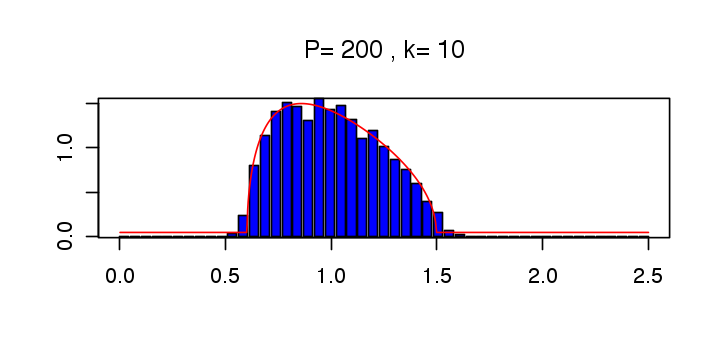

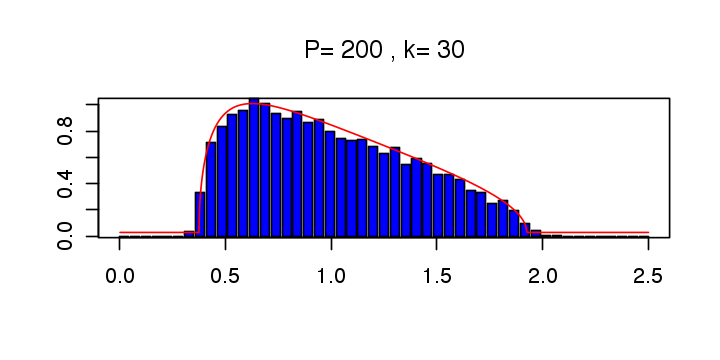

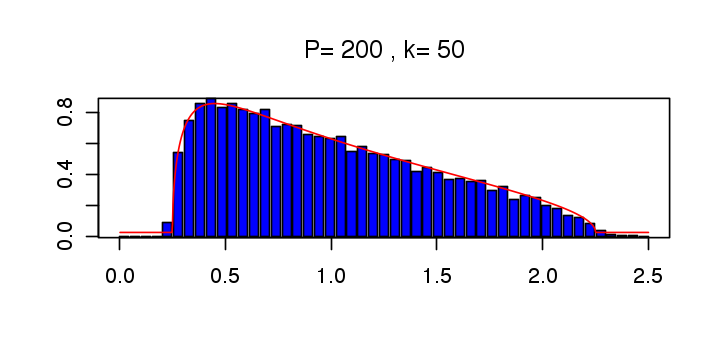

In [21]:
source("nt_solutions/sparsity_6_l1_recovery/exo4.R")

In [22]:
## Insert your code here.

__Exercise 5__

Estimate numerically lower bound on $\de_k^1,\de_k^2$ by Monte-Carlo
sampling of sub-matrices.

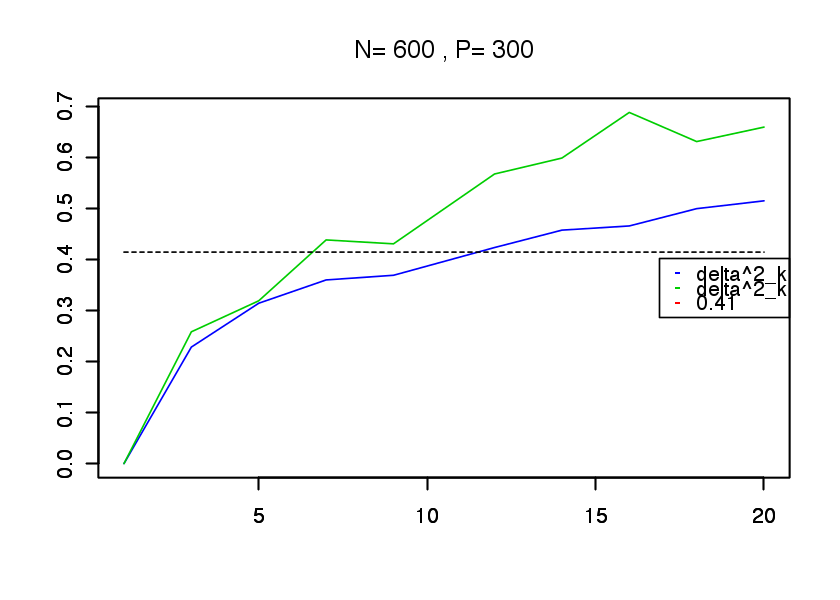

In [23]:
source("nt_solutions/sparsity_6_l1_recovery/exo5.R")

In [24]:
## Insert your code here.

Sparse Spikes Deconvolution
---------------------------
We now consider a convolution dictionary $ \Phi $.
Such a dictionary is used with sparse regulariz


Second derivative of Gaussian kernel $g$ with a given variance $\si^2$.

In [25]:
sigma = 6
g = function(x){(1 - (x**2 / sigma**2)) * exp(-x**2/(2*sigma**2))}

Create a matrix $\Phi$ so that $\Phi x = g \star x$ with periodic
boundary conditions.

In [26]:
P = 1024
t = meshgrid(0:(P - 1),0:(P - 1))
Y = t$X
X = t$Y
Phi = normalize(g((X - Y + P/2.) %% P - P/2.))

To improve the conditionning of the dictionary, we sub-sample its atoms,
so that $ P = \eta N > N $.

In [27]:
eta = 2.
N = P/eta
Phi = Phi[,seq(1, dim(Phi)[2], by=eta)]

Plot the correlation function associated to the filter.
Can you determine the value of the coherence $\mu(\Phi)$?

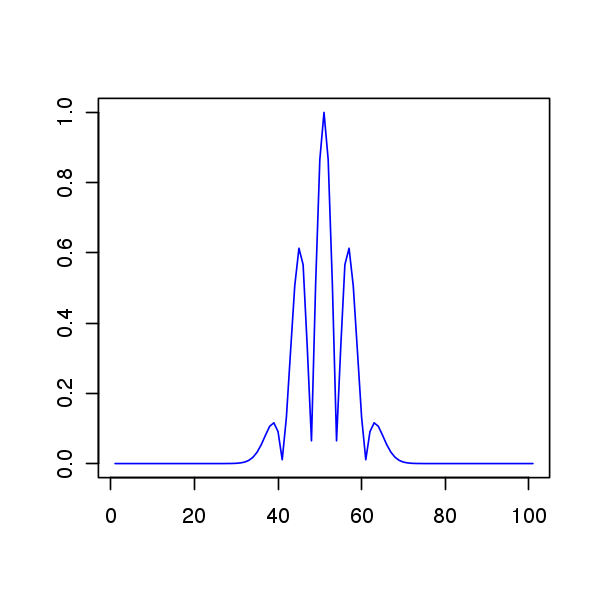

In [28]:
c = t(Phi) %*% Phi
c = abs(c[,dim(c)[2]/2])

options(repr.plot.width=5, repr.plot.height=5)
plot(c[(length(c)/2 - 50):((length(c)/2) + 50)], type="l", xlab="", ylab="", col=4)

In [29]:
roll <- function( x , n ){
  if( n == 0 )
    return( x )
  c( tail(x,n) , head(x,-n) )
}

In [30]:
twosparse = function(d){roll(c(1, rep(0, d), -1, rep(0, N - d- 2)), as.integer(N/2 - d/2))}

Display $x_0$ and $\Phi x_0$.

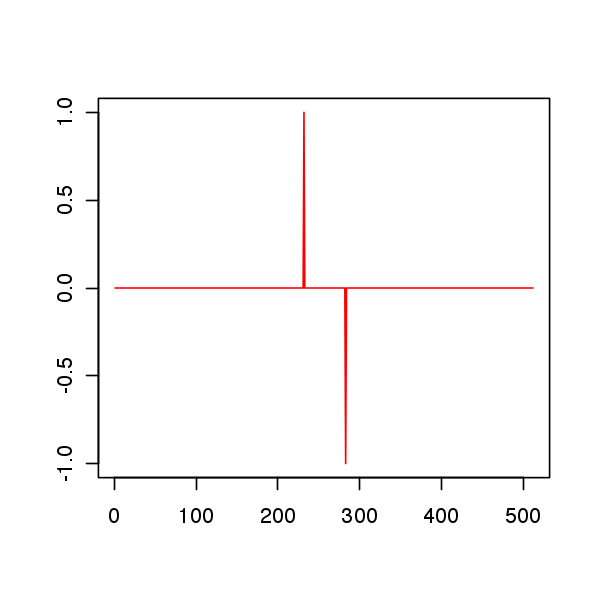

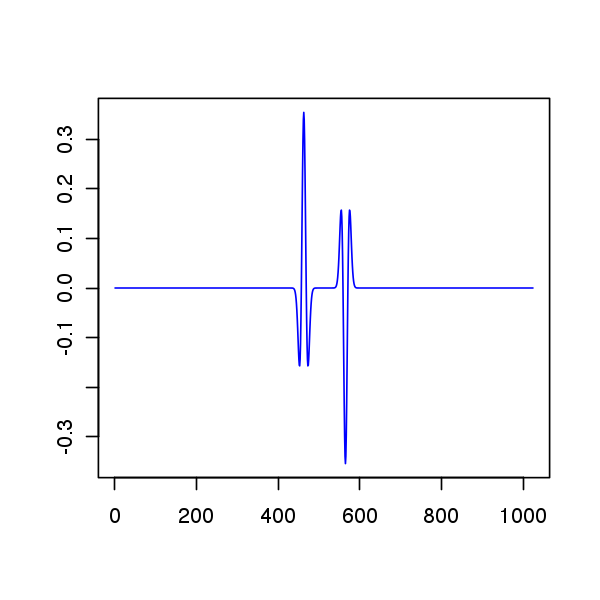

In [31]:
x0 = twosparse(50)

plot(x0, type="l", col=2, ylab="", xlab="")
plot(Phi %*% x0, type="l", col=4, ylab="", xlab="")

__Exercise 6__

Plot the evolution of the criteria F, ERC and Coh as a function of $d$.
Do the same plot for other signs patterns for $x_0$.
Do the same plot for a Dirac comb with a varying spacing $d$.

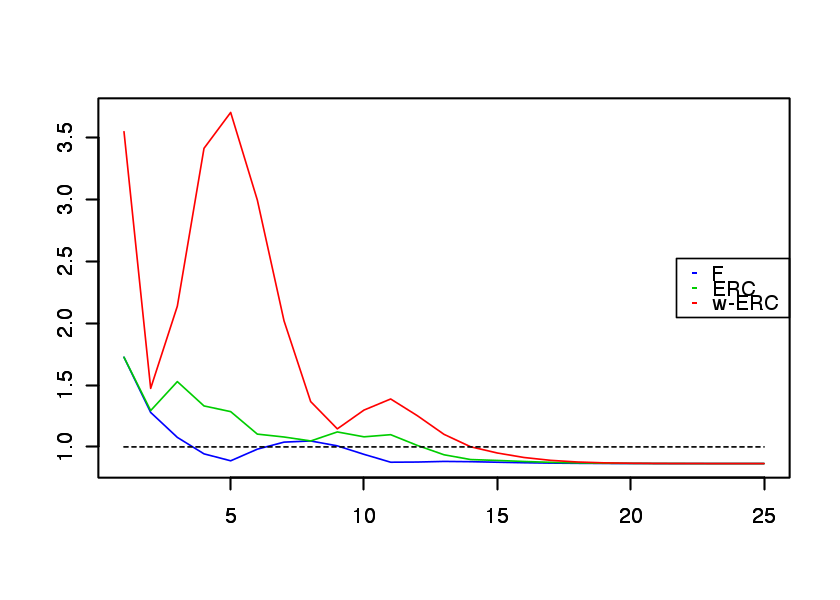

In [32]:
source("nt_solutions/sparsity_6_l1_recovery/exo6.R")

In [33]:
#Insert your code here.

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>